In [309]:

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import roc_curve , auc
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


In [2]:
df1= pd.read_csv('data/query-test-1602485092979.csv', dtype= {'mobile_id': str}) #tháng 8
df2= pd.read_csv('data/query-test-1602485115328.csv', dtype= {'mobile_id': str})# tháng 9

In [9]:
len(df1[df1['mobile_id'].isin(df2['mobile_id'])])/len(df1) # tỷ lệ churn khoảng 23%

77.07346303637111

In [152]:
df1[~df1['mobile_id'].isin(df2['mobile_id'])].to_csv('data/churn.csv')

In [10]:
# giờ xem giao dịch của những thằng tháng 8

In [15]:
df1.columns= ['mobile_id', 'amount']

In [16]:
df=df1.sample(10000)

In [17]:
df.to_csv('data/taptb.csv')

In [36]:
df_lsdg= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603349126294.csv', dtype= {'mobile_id': str})
df_lsdg.head()

,mobile_id,count(request_date),sum(trans_amount)
0,36670927,19,13795000
1,23930723,15,292200
2,39934694,16,7012206
3,32280592,91,26483812
4,35521126,5,1688110


In [29]:
df_lk = pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603350138923.csv', dtype= {'mobile_id': str})
df_lk.head()

,mobile_id,STATUS
0,14083870,3
1,10093086,1
2,17094875,1
3,28552674,1
4,30209827,1


In [31]:
df_sd= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603364017682.csv',dtype= {'mobile_id': str})
df_sd

,MSISDN,sd
0,H-JSHW^UYJI2=98=>59;>76-EH,"33,397"
1,H-JSHW^UYJI2=98:8;7;:;<-EH,"21,072"
2,H-JSHW^UYJI2=9><<68=;:=-EH,"11,034,937"
3,H-JSHW^UYJI2=9>=:5;75=7-EH,"1,095,000"
4,H-JSHW^UYJI2=98;:::7;=6-EH,900
...,...,...
9339,H-JSHW^UYJI2=9><7;:;8>:-EH,"3,116"
9340,H-JSHW^UYJI2=9><9:>>>58-EH,"208,816"
9341,H-JSHW^UYJI2=9>;<;>88;;-EH,"6,090,435"
9342,H-JSHW^UYJI2=9>=6:67==9-EH,"11,581"


In [67]:
df_sdt = pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603444456382.csv',dtype= {'mobile_id': str} )

In [32]:
df_loai_gd= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603365343735.csv')
df_loai_gd

,MSISDN,count(DISTINCT service_code_group)
0,H-JSHW^UYJI2=9>=:6><=9=-EH,6
1,H-JSHW^UYJI2=9>6;8<5><=-EH,3
2,H-JSHW^UYJI2=9>;9==>;<=-EH,1
3,H-JSHW^UYJI2=9><<68=;:=-EH,1
4,H-JSHW^UYJI2=9>6=55;==7-EH,1
...,...,...
1241942,H-JSHW^UYJI2=9>=6;<8;<9-EH,1
1241943,H-JSHW^UYJI2=9889=>:9:6-EH,1
1241944,H-JSHW^UYJI2=9>;<=5;875-EH,1
1241945,H-JSHW^UYJI2=9>=8=866<5-EH,1


In [35]:
df_tttd= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603365946750.csv', dtype= {'mobile_id': str})
df_tttd

,mobile_id,count(service_code)
0,15766204,1
1,24201344,1
2,27383701,2
3,31187615,1
4,13497795,2
...,...,...
272,7707320,1
273,32111624,1
274,35072940,1
275,35279980,1


In [41]:
df_tb= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603438286899.csv', dtype= {'mobile_id': str})
df_tb.sort_values('issue_date')

,mobile_id,issue_date,updated_date
4586,7233319,2016-05-30T02:52:35.000+07:00,2020-09-18T02:35:52.000+07:00
4585,7242533,2016-05-30T10:40:53.000+07:00,2020-09-09T02:37:55.000+07:00
4584,7257404,2016-05-30T22:02:48.000+07:00,2020-10-22T02:43:08.000+07:00
4587,7264925,2016-05-31T05:26:46.000+07:00,2020-10-11T19:40:17.000+07:00
4588,7291598,2016-06-06T10:01:28.000+07:00,2020-10-21T02:32:53.000+07:00
...,...,...,...
2946,44021506,2020-08-31T20:32:45.000+07:00,2020-10-19T02:35:56.000+07:00
2749,44021630,2020-08-31T20:33:43.000+07:00,2020-09-21T02:21:24.000+07:00
3023,44023120,2020-08-31T21:15:10.000+07:00,2020-09-01T02:44:15.000+07:00
2928,44025020,2020-08-31T22:17:13.000+07:00,2020-10-11T02:39:56.000+07:00


In [243]:
df_loi= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603440413769.csv', dtype= {'mobile_id': str})

In [244]:
df_loi

,mobile_id,count(error_code)
0,31513914,37
1,43253919,13
2,40466030,4
3,35526920,1
4,41979110,1
...,...,...
5380,36950846,1
5381,37100813,3
5382,29773677,1
5383,29479438,1


In [45]:
pd.read_csv('data/Book1.txt', dtype= {'mobile_id': str})

,MOBILE_ID
0,7120690
1,7201189
2,7209027
3,7204038
4,7159002
...,...
641840,44686929
641841,44921124
641842,44670467
641843,44969327


In [69]:
df_final= pd.read_csv('data/taptb.csv', dtype= {'mobile_id': str})

In [70]:
df=df_final.copy()

In [71]:
df

,Unnamed: 0,mobile_id,amount
0,809743,22592718,"10,800"
1,1224617,37464471,"20,100,000"
2,646143,14143210,"156,939,092"
3,181430,37891921,"50,000,000"
4,272343,24307401,"30,841,000"
...,...,...,...
9995,1027360,39937782,"53,648,500"
9996,555433,36224084,"403,061"
9997,729865,31810765,"1,400,000"
9998,836916,14116921,"183,155,287"


In [72]:
df= df.drop(columns= ['Unnamed: 0'])

In [74]:
df= df.merge(df_sdt, on= 'mobile_id')

In [76]:
df= df.merge(df_lsdg, on= 'mobile_id')

In [81]:
df_lk['mobile_id1'] = df_lk['mobile_id'].str.split('.').str[0]

In [82]:
df_lk

,mobile_id,STATUS,mobile_id1
0,14083870,3,14083870
1,10093086,1,10093086
2,17094875,1,17094875
3,28552674,1,28552674
4,30209827,1,30209827
...,...,...,...
15276,30062023.0000000000,1,30062023
15277,40848614.0000000000,1,40848614
15278,43295387.0000000000,1,43295387
15279,43304254.0000000000,1,43304254


In [86]:
df['lk']= 0
df.loc[(df['mobile_id'].isin(df_lk['mobile_id1'])),'lk']= 10

In [101]:
df_lk =df_lk[df_lk['STATUS']== 1]

In [102]:
df[df['mobile_id'].isin(df_lk['mobile_id1'])]

,mobile_id,amount,MSISDN,count(request_date),sum(trans_amount),lk
0,22592718,"10,800",H-JSHW^UYJI2=9>;68=>666-EH,2,20800,0
1,37464471,"20,100,000",H-JSHW^UYJI2=9><>;=5<89-EH,15,37500508,0
2,14143210,"156,939,092",H-JSHW^UYJI2=98::9:7:87-EH,60,315383948,0
3,37891921,"50,000,000",H-JSHW^UYJI2=987=6;967<-EH,1,50000000,0
4,24307401,"30,841,000",H-JSHW^UYJI2=9=;<<<<8=9-EH,42,151265406,0
...,...,...,...,...,...,...
9995,39937782,"53,648,500",H-JSHW^UYJI2=9>9>=:>69=-EH,71,104298500,0
9996,36224084,"403,061",H-JSHW^UYJI2=98<789668>-EH,3,403061,0
9997,31810765,"1,400,000",H-JSHW^UYJI2=98=;;85;<=-EH,19,8800000,0
9998,14116921,"183,155,287",H-JSHW^UYJI2=9>==555<5<-EH,22,353334345,0


In [103]:
df_saving = pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603447468605.csv')
df_saving

,MSISDN
0,H-JSHW^UYJI2=9>;>666<57-EH
1,H-JSHW^UYJI2=9>;>666<57-EH
2,H-JSHW^UYJI2=9>=<==7==;-EH
3,H-JSHW^UYJI2=9>=>:6=<;8-EH
4,H-JSHW^UYJI2=98=:>5=>8;-EH
...,...
88204,H-JSHW^UYJI2=9>5<657659-EH
88205,H-JSHW^UYJI2=98;=59=699-EH
88206,H-JSHW^UYJI2=9>;7;5:8;7-EH
88207,H-JSHW^UYJI2=98>;;88958-EH


In [105]:
df[df['MSISDN'].isin(df_saving['MSISDN'])]

,mobile_id,amount,MSISDN,count(request_date),sum(trans_amount),lk
1,37464471,"20,100,000",H-JSHW^UYJI2=9><>;=5<89-EH,15,37500508,0
14,23416263,"6,805,000",H-JSHW^UYJI2=98:88:9=>8-EH,17,12577000,0
26,28469449,"70,050,571",H-JSHW^UYJI2=9><<:5=<<:-EH,47,106951968,0
100,22293176,"23,095,573",H-JSHW^UYJI2=9>=<5;:978-EH,24,52176679,0
102,22770739,"410,000",H-JSHW^UYJI2=9=;=><98:>-EH,8,1510000,0
...,...,...,...,...,...,...
9759,34377796,"36,098,005",H-JSHW^UYJI2=98<:76:98<-EH,33,58409140,0
9768,14148860,"157,279,430",H-JSHW^UYJI2=9>;:9<=<=<-EH,72,273054722,0
9807,8906065,"62,142,277",H-JSHW^UYJI2=9>==55577=-EH,52,177533664,0
9862,31056033,"1,891,000",H-JSHW^UYJI2=9:=<>=6;5=-EH,16,10681000,0


In [109]:
df= df_sd.merge(df, on = 'MSISDN')

In [110]:
df['saving']= 0

In [111]:
df.loc[(df['MSISDN'].isin(df_saving['MSISDN'])),'saving']= 1

In [116]:
df= df.merge(df_loai_gd, on = 'MSISDN', how = 'left')

In [118]:
df['tttd']= 0
df.loc[(df['mobile_id'].isin(df_tttd['mobile_id'])),'tttd']= 1

In [127]:
df= df.merge(df_tb, on = 'mobile_id', how = 'left')

In [237]:
df_x= pd.read_csv('/u01/vtpay/truongnd/dataquery-test-1603449577302.csv', dtype= {'mobile_id': str})
# liên kết

In [187]:
df_x

,mobile_id,STATUS,mobile_id1
0,18764588.0000000000,1,18764588
1,25369514.0000000000,1,25369514
2,14460108.0000000000,1,14460108
3,8615098.0000000000,1,8615098
4,7715150.0000000000,1,7715150
...,...,...,...
1365,25927081.0000000000,1,25927081
1366,17116656.0000000000,-1,17116656
1367,36105033.0000000000,-1,36105033
1368,36763373.0000000000,1,36763373


In [240]:
df_x['mobile_id1'] = df_x['mobile_id'].str.split('.').str[0]

In [125]:
df.loc[(df['lk'].isin(df_x['mobile_id'])),'lk']= 1

In [132]:
df.to_csv('data/luudata.csv')

In [130]:
import datetime

datetime_object = datetime.datetime.now()
print(datetime_object)

2020-10-23 17:50:05.140550


In [232]:
df= df.merge(df_loi, on = 'mobile_id')

In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9344 entries, 0 to 9343
Data columns (total 19 columns):
Unnamed: 0                            9344 non-null int64
MSISDN                                9344 non-null object
sd                                    9344 non-null float64
mobile_id                             9344 non-null object
amount                                9344 non-null float64
count(request_date)                   9344 non-null int64
sum(trans_amount)                     9344 non-null int64
lk                                    9344 non-null int64
saving                                9344 non-null int64
count(DISTINCT service_code_group)    9344 non-null float64
tttd                                  9344 non-null int64
issue_date                            9344 non-null datetime64[ns, pytz.FixedOffset(420)]
updated_date                          9344 non-null object
count(error_code)                     9344 non-null float64
updated_date=                         

In [140]:
import datetime

today = datetime.date.today()
print(today)

2020-10-23


In [249]:
df= pd.read_csv('data/luudata.csv', dtype= {'mobile_id': str})

In [147]:
import datetime

In [250]:
df.loc[(df['mobile_id'].isin(df_x['mobile_id1'])),'lk']= 10

In [253]:
df= df.merge(df_loi, on= 'mobile_id', how = 'left')

In [155]:
df1 = pd.read_csv('data/churn.csv', dtype={'mobile_id': str})
df1

,Unnamed: 0,mobile_id,amount
0,14,27646720,"100,000,000"
1,29,23943377,"540,000"
2,82,36419075,"358,500"
3,98,34972727,"1,830,000"
4,110,17980830,"310,000"
...,...,...,...
290391,1266631,10765873,"20,000"
290392,1266632,31465924,"700,000"
290393,1266633,35093955,"26,000"
290394,1266634,43371803,"50,000"


In [158]:
df= pd.read_csv('data/luudata.csv', dtype={'mobile_id': str})

In [256]:
df['issue_date'] = pd.to_datetime(df['issue_date'] )
df['updated_date= ']=pd.to_datetime(df['updated_date'] )
df['year'] = df['issue_date'].dt.year
df['month'] = df['issue_date'].dt.month

In [257]:
def sub_month(a, b): 
 
      return  10- a+ 12*(2020- b)

df['real_sub'] = df.apply(lambda row : sub_month(row['month'], 
                     row['year']), axis = 1) 

In [258]:
df['churn']= 0
df.loc[df['mobile_id'].isin(df1['mobile_id']), 'churn'] = 1

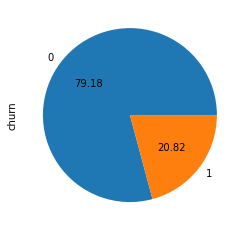

In [259]:
df['churn'].value_counts().plot.pie(autopct= '%0.2f')

In [280]:
df

,Unnamed: 0,MSISDN,sd,mobile_id,amount,count(request_date),sum(trans_amount),lk,saving,count(DISTINCT service_code_group),tttd,issue_date,updated_date,count(error_code),updated_date=,year,month,real_sub,churn
0,0,H-JSHW^UYJI2=98=>59;>76-EH,"33,396.7742",30794821,"189,000.0000",2,451500,0,0,0.0000,1,2019-11-22 10:11:46+07:00,2020-09-30T02:30:10.000+07:00,28.0000,2020-09-30 02:30:10+07:00,2019,11,11,0
1,1,H-JSHW^UYJI2=98:8;7;:;<-EH,"21,071.6774",37749472,"3,898,254.0000",12,5098254,10,0,2.0000,0,2020-05-27 18:47:01+07:00,2020-10-18T02:37:10.000+07:00,9.0000,2020-10-18 02:37:10+07:00,2020,5,5,0
2,2,H-JSHW^UYJI2=9><<68=;:=-EH,"11,034,937.0645",36788705,"5,600,000.0000",5,21200000,0,0,1.0000,0,2020-04-22 12:17:59+07:00,2020-10-22T02:28:34.000+07:00,3.0000,2020-10-22 02:28:34+07:00,2020,4,6,0
3,3,H-JSHW^UYJI2=9>=:5;75=7-EH,"1,095,000.0000",43222307,"20,125,000.0000",20,70719900,0,0,2.0000,0,2020-08-03 18:33:42+07:00,2020-10-16T02:28:32.000+07:00,4.0000,2020-10-16 02:28:32+07:00,2020,8,2,0
4,4,H-JSHW^UYJI2=98;:::7;=6-EH,900.0000,43437069,"50,030,000.0000",3,50030000,0,0,2.0000,0,2020-08-11 19:39:21+07:00,2020-08-20T02:47:27.000+07:00,0.0000,2020-08-20 02:47:27+07:00,2020,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,9339,H-JSHW^UYJI2=9><7;:;8>:-EH,"3,116.1290",42386314,"9,700.0000",1,9700,0,0,1.0000,0,2020-07-04 11:43:12+07:00,2020-08-11T02:31:24.000+07:00,0.0000,2020-08-11 02:31:24+07:00,2020,7,3,1
9340,9340,H-JSHW^UYJI2=9><9:>>>58-EH,"208,816.2903",28468987,"4,890,000.0000",19,9715000,0,0,2.0000,0,2019-09-26 09:38:10+07:00,2020-10-11T02:41:36.000+07:00,1.0000,2020-10-11 02:41:36+07:00,2019,9,13,0
9341,9341,H-JSHW^UYJI2=9>;<;>88;;-EH,"6,090,435.1290",20342210,"35,958,000.0000",9,35958000,0,0,3.0000,0,2018-11-22 15:57:23+07:00,2020-08-09T02:26:22.000+07:00,3.0000,2020-08-09 02:26:22+07:00,2018,11,23,1
9342,9342,H-JSHW^UYJI2=9>=6:67==9-EH,"11,581.1613",33591936,"30,600.0000",7,102700,0,0,1.0000,0,2020-01-22 23:00:48+07:00,2020-10-05T02:27:00.000+07:00,1.0000,2020-10-05 02:27:00+07:00,2020,1,9,0


In [260]:
df= df.fillna(value=0)

In [281]:
df['tyle_loi']= df['count(error_code)']/ df['count(request_date)']

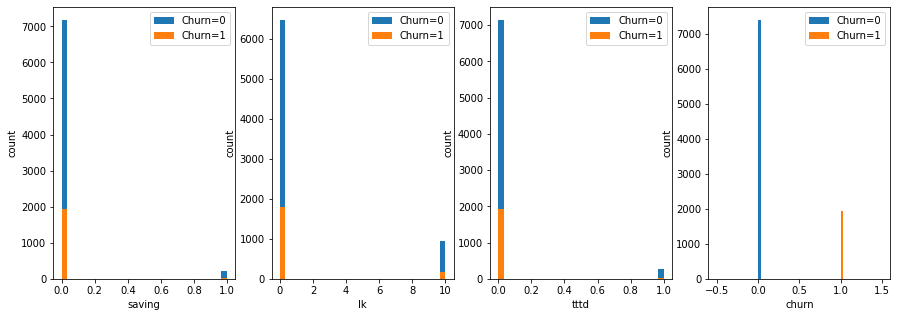

In [282]:
category_var=['saving', 'lk','tttd', 'churn']
fig , ax = plt.subplots(1,4,figsize=(15,5))
for i , x in enumerate(category_var):
    ax[i].hist(df[x][df['churn']==0],label='Churn=0',bins=30)
    ax[i].hist(df[x][df['churn']==1],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

In [283]:
continues_var= ['sd',
 'count(request_date)',
 'sum(trans_amount)',
 'count(DISTINCT service_code_group)',
 'real_sub','tyle_loi']

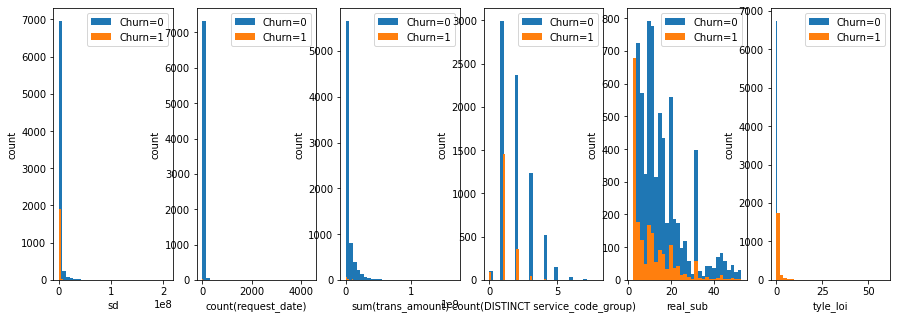

In [284]:
fig , ax = plt.subplots(1,6,figsize=(15,5))
for i , x in enumerate(continues_var):
    ax[i].hist(df[x][df.churn== 0],label='Churn=0',bins=30)
    ax[i].hist(df[x][df.churn== 1],label='Churn=1',bins=30)
    ax[i].set(xlabel=x,ylabel='count')
    ax[i].legend()

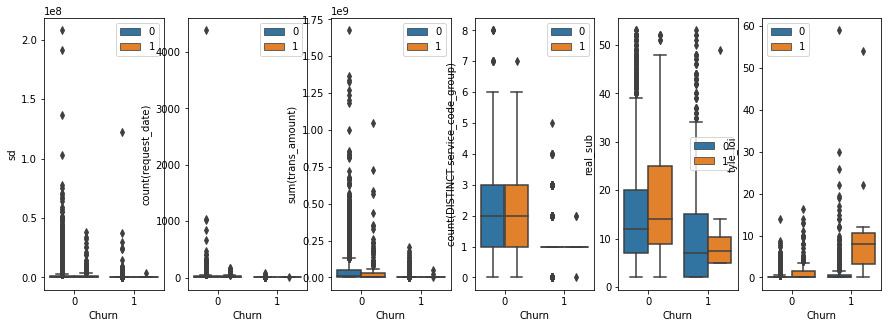

In [285]:
fig , ax = plt.subplots(1,6,figsize=(15,5))
for i , xi in enumerate(continues_var):
    sns.boxplot(x=df.churn,y=df[xi],ax=ax[i],hue=df.tttd)
    ax[i].set(xlabel='Churn',ylabel=xi)
    ax[i].legend()

In [553]:
feature= ['sd', 'count(request_date)', 'sum(trans_amount)', 'lk','saving',  'count(DISTINCT service_code_group)', 'tttd', 'real_sub','tyle_loi' ]

In [554]:
X= df[feature]
y= df['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [555]:

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [289]:
y_pred= clf.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1495
           1       0.91      0.61      0.73       374

    accuracy                           0.91      1869
   macro avg       0.91      0.80      0.84      1869
weighted avg       0.91      0.91      0.90      1869



Text(91.68, 0.5, 'predicted label')

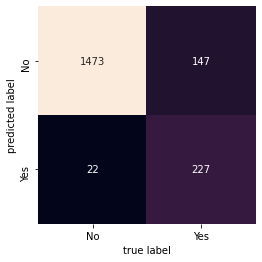

In [290]:
#Confusion Matrix
mat = confusion_matrix(y_test, y_pred)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
          xticklabels=['No','Yes'],
          yticklabels=['No','Yes'] )
plt.xlabel('true label')
plt.ylabel('predicted label')

In [291]:
pd.options.display.float_format = '{:,.4f}'.format
weight = pd.DataFrame({'features': X.columns, 'weight': clf.feature_importances_}, columns=['features', 'weight'])


In [292]:
clf.feature_importances_

array([9.19558562e-02, 5.31138214e-01, 2.68339984e-01, 8.81331839e-04,
       2.95885956e-04, 3.04327685e-02, 1.33174831e-03, 5.69337296e-02,
       1.86904817e-02])

In [294]:
weight

,features,weight
0,sd,0.0920
1,count(request_date),0.5311
2,sum(trans_amount),0.2683
3,lk,0.0009
4,saving,0.0003
5,count(DISTINCT service_code_group),0.0304
6,tttd,0.0013
7,real_sub,0.0569
8,tyle_loi,0.0187


In [311]:
X.columns= ['SO_DU',' SLGD', 'GTGD', 'LIEN_KET', 'TIET_ KIEM', 'SO_LOAI_DICH_VU', 'TTTD', 'THOI_GIAN_TAO','TYLE_LOI']

Text(0.5, 0, 'Random Forest Feature Importance')

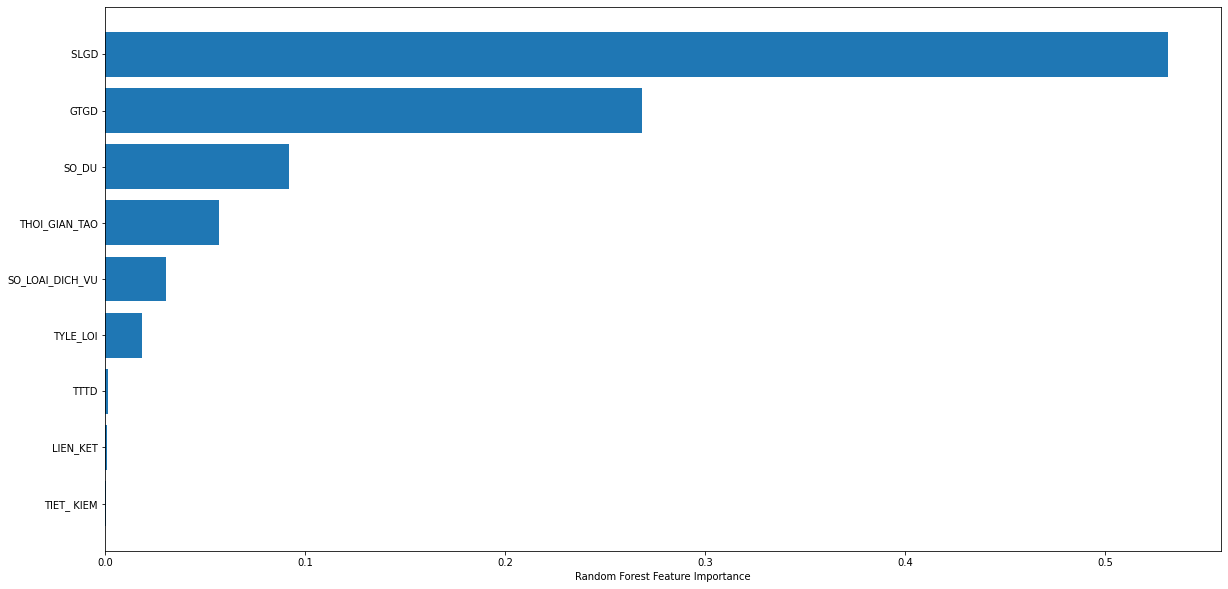

In [312]:
plt.figure( figsize= (20,10))
sorted_idx = clf.feature_importances_.argsort()
plt.barh(X.columns[sorted_idx], clf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

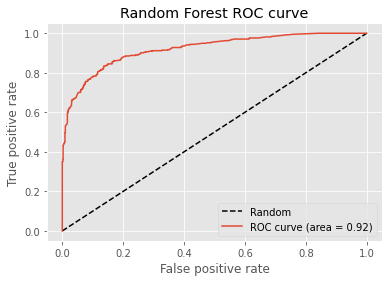

In [556]:
y_pred_proba=clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc=auc(fpr,tpr)
# ROC using fpr , tpr
plt.plot([0, 1], [0, 1], 'k--',label='Random')
plt.plot(fpr,tpr,label='ROC curve (area = %0.2f)' %roc_auc)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest ROC curve')
plt.legend(loc='best')

In [314]:
#lưu lại data cái
df.to_csv('data/data_raw.csv')


In [525]:
df_raw = pd.read_csv('data/data_raw.csv', dtype={'mobile_id': str})

In [537]:
df=pd.read_csv('data/data_raw.csv', dtype={'mobile_id': str})

In [ ]:
#xnormalized=100(x−min(x))/ (max(x)−min(x)

In [332]:
for i in continues_var:
    print(i, max(df[i]))
for i in continues_var:
    print(i,min(df[i]))    

sd 207737224.967742
count(request_date) 4385
sum(trans_amount) 1675712000
count(DISTINCT service_code_group) 8.0
real_sub 53
tyle_loi 59.0
sd 0.08
count(request_date) 1
sum(trans_amount) 1000
count(DISTINCT service_code_group) 0.0
real_sub 2
tyle_loi 0.0


In [335]:
def scale(a, max_x, min_x): 
 
      return  100*(a − min_x)/ (max_x−min_x)
for i in continues_var:
    max_x= max(df[i])
    min_x= min(df[i])
    

df['i'] = df.apply(lambda row : scale(row[i]), axis = 1) 

SyntaxError: invalid character in identifier (<ipython-input-335-246e1979c3f5>, line 3)

In [336]:
a, b = 0, 100
x, y = df.sd.min(), df.sd.max()
df['sd_1'] = (df.sd - x) / (y - x) * (b - a) + a

In [504]:
continues_var

['sd',
 'count(request_date)',
 'sum(trans_amount)',
 'count(DISTINCT service_code_group)',
 'real_sub',
 'tyle_loi']

In [538]:
for i in continues_var_1:
    df[i] =  pd.qcut(df[i].rank(method='first').values, 11, labels=[0,1,2,3,4,5,6,7,8,9,10])


In [539]:
df['tyle_loi'] =  pd.qcut(df['tyle_loi'].rank(method='first').values, 11, labels=[10,9,8,7,6,5,4,3,2,1,0])

In [390]:
std_scaler = StandardScaler()
std_scaler
# fit and transform the data
df[continues_var] = std_scaler.fit_transform(df[continues_var])

In [511]:
df[continues_var].describe()

,sd,count(request_date),sum(trans_amount),count(DISTINCT service_code_group),real_sub,tyle_loi
count,9344,9344,9344,9344,9344,9344
unique,10,10,10,10,10,10
top,1,1,1,1,1,10
freq,935,935,935,935,935,935


In [497]:
df= df[df['sd']< 20000000]
df= df[df['sum(trans_amount)']< 200000000]

In [392]:
for i in continues_var:
    df= df[df[i]< 2]

In [393]:
# chuyển đổi sang thanh điểm 10 từ z-SCORE Sten score
def sten(z): 
    if z >= 2:
        return 10
    elif 1.5 <= z < 2:
        return 9
    elif 1<= z < 1.5:
        return 8
    elif 0.5 <= z < 1:
        return 7
    elif 0<= z < 0.5:
        return 6
    elif -0.5 <= z< 0:
        return 5
    elif -1 <= z< -0.5:
        return 4
    elif -1.5 <= z< -1:
        return 3
    elif -2<= z< -1.5:
        return 2
    else :
        return 1


In [394]:
# chuyển đổi sang thanh điểm 10 từ z-SCORE Sten score
def sten_(z): 
    if z >= 2:
        return 1
    elif 1.5 <= z < 2:
        return 2
    elif 1<= z < 1.5:
        return 3
    elif 0.5 <= z < 1:
        return 4
    elif 0<= z < 0.5:
        return 5
    elif -0.5 <= z< 0:
        return 6
    elif -1 <= z< -0.5:
        return 7
    elif -1.5 <= z< -1:
        return 8
    elif -2<= z< -1.5:
        return 9
    else :
        return 10

In [498]:
continues_var_1= ['sd',
 'count(request_date)',
 'sum(trans_amount)',
 'count(DISTINCT service_code_group)',
 'real_sub']

In [499]:
for i in continues_var_1:
    df[i]= df[i].apply(sten)

In [500]:
df['tyle_loi']= df['tyle_loi'].apply(sten_)

In [479]:
features_=['sd', 'mobile_id','count(request_date)', 'sum(trans_amount)', 'lk', 'saving','count(DISTINCT service_code_group)', 'tttd', 'count(error_code)', 'real_sub', 'tyle_loi']

In [540]:
def score(a, b,c,d,e,f,g,h, i): 
 
      return  a*0.0920+b*0.5311+c*0.2683+d*0.0009+e*0.0003+f*0.0304+g*0.0013+h*0.0569+i*0.0187

df['score'] = df.apply(lambda row : score(row['sd'], 
                     row['count(request_date)'], row['sum(trans_amount)'], row['lk'],row['saving'], row['count(DISTINCT service_code_group)'],row['tttd'],row['real_sub'],row['tyle_loi']), axis = 1) 

In [502]:
df[continues_var].describe()

,sd,count(request_date),sum(trans_amount),count(DISTINCT service_code_group),real_sub,tyle_loi
count,"8,833.0000","8,833.0000","8,833.0000","8,833.0000","8,833.0000","8,833.0000"
mean,9.9974,9.7980,10.0000,8.9324,10.0000,4.6503
std,0.0921,0.6027,0.0000,1.0797,0.0000,0.9312
min,6.0000,8.0000,10.0000,6.0000,10.0000,1.0000
25%,10.0000,10.0000,10.0000,8.0000,10.0000,5.0000
50%,10.0000,10.0000,10.0000,8.0000,10.0000,5.0000
75%,10.0000,10.0000,10.0000,10.0000,10.0000,5.0000
max,10.0000,10.0000,10.0000,10.0000,10.0000,5.0000


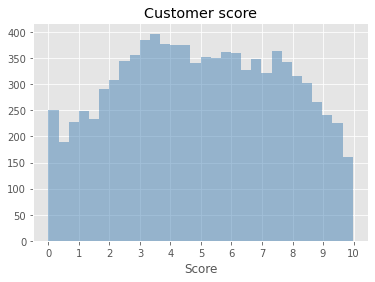

In [565]:
plt.style.use('ggplot')
plt.hist(df['score'], bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Customer score')
plt.xlabel('Score')
plt.xticks(np.arange(11))
plt.show()

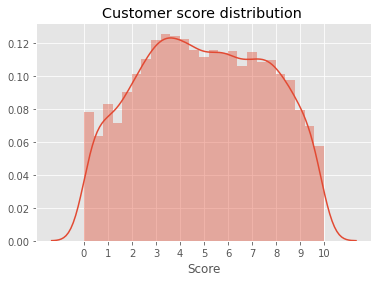

In [566]:
sns.distplot(df['score'])
plt.title('Customer score distribution ')
plt.xlabel('Score')
plt.xticks(np.arange(11))
plt.show()


In [592]:
df_raw[df_raw['mobile_id'].isin(df[df['score']>= 8]['mobile_id'])][feature]

,sd,count(request_date),sum(trans_amount),lk,saving,count(DISTINCT service_code_group),tttd,real_sub,tyle_loi
9,"3,438.4516",69,73764000,10,0,2.0000,0,11,0.7391
30,"814,205.7000",44,20594170,0,0,4.0000,0,12,0.0682
36,"235,252.7742",25,171177351,0,0,2.0000,0,32,0.0000
38,"224,175.1667",60,112007021,0,0,1.0000,0,21,0.5333
41,"1,522,178.8571",32,80358667,0,0,3.0000,0,22,0.5938
...,...,...,...,...,...,...,...,...,...
9322,"227,097.1642",74,115615568,10,0,2.0000,0,14,0.6081
9326,"2,440,567.3226",51,73152000,0,0,2.0000,0,16,0.1373
9328,"597,167.4194",43,57102000,10,0,2.0000,0,9,0.2558
9330,"850,648.8065",52,238052000,0,0,1.0000,0,10,0.0962


In [595]:
df_raw[df_raw['mobile_id'].isin(df[df['score'] <3]['mobile_id'])][feature].describe()

,sd,count(request_date),sum(trans_amount),lk,saving,count(DISTINCT service_code_group),tttd,real_sub,tyle_loi
count,"2,461.0000","2,461.0000","2,461.0000","2,461.0000","2,461.0000","2,461.0000","2,461.0000","2,461.0000","2,461.0000"
mean,"161,565.0828",2.1426,"1,293,265.2141",0.7314,0.0024,1.0358,0.0341,10.3381,0.8056
std,"1,155,705.5843",1.1744,"5,233,509.1323",2.6042,0.0493,0.3777,0.1816,9.3687,2.6165
min,0.0800,1.0000,"1,000.0000",0.0000,0.0000,0.0000,0.0000,2.0000,0.0000
25%,"3,300.0000",1.0000,"50,000.0000",0.0000,0.0000,1.0000,0.0000,3.0000,0.0000
50%,"15,057.1429",2.0000,"200,000.0000",0.0000,0.0000,1.0000,0.0000,8.0000,0.0000
75%,"65,948.6129",3.0000,"615,000.0000",0.0000,0.0000,1.0000,0.0000,14.0000,0.6667
max,"50,846,092.0000",7.0000,"100,000,000.0000",10.0000,1.0000,3.0000,1.0000,53.0000,59.0000


In [579]:
len(df_raw[df_raw['mobile_id'].isin(df[df['score'] <3]['mobile_id'])][feature]) /len(df_raw)

0.2633775684931507

In [597]:
df['score'].mean()

4.988099497003425

In [589]:
df_raw[df_raw['mobile_id'].isin(df[df['score'] <3]['mobile_id'])]['mobile_id'].isin(df1['mobile_id'])

0       False
5        True
6       False
7       False
11       True
        ...  
9317     True
9319     True
9329     True
9337    False
9339     True
Name: mobile_id, Length: 2461, dtype: bool

In [591]:
df1

,Unnamed: 0,mobile_id,amount
0,14,27646720,"100,000,000.0000"
1,29,23943377,"540,000.0000"
2,82,36419075,"358,500.0000"
3,98,34972727,"1,830,000.0000"
4,110,17980830,"310,000.0000"
...,...,...,...
290391,1266631,10765873,"20,000.0000"
290392,1266632,31465924,"700,000.0000"
290393,1266633,35093955,"26,000.0000"
290394,1266634,43371803,"50,000.0000"


In [590]:
df_raw

,Unnamed: 0,Unnamed: 0.1,MSISDN,sd,mobile_id,amount,count(request_date),sum(trans_amount),lk,saving,...,tttd,issue_date,updated_date,count(error_code),updated_date=,year,month,real_sub,churn,tyle_loi
0,0,0,H-JSHW^UYJI2=98=>59;>76-EH,"33,396.7742",30794821,"189,000.0000",2,451500,0,0,...,1,2019-11-22 10:11:46+07:00,2020-09-30T02:30:10.000+07:00,28.0000,2020-09-30 02:30:10+07:00,2019,11,11,0,14.0000
1,1,1,H-JSHW^UYJI2=98:8;7;:;<-EH,"21,071.6774",37749472,"3,898,254.0000",12,5098254,10,0,...,0,2020-05-27 18:47:01+07:00,2020-10-18T02:37:10.000+07:00,9.0000,2020-10-18 02:37:10+07:00,2020,5,5,0,0.7500
2,2,2,H-JSHW^UYJI2=9><<68=;:=-EH,"11,034,937.0645",36788705,"5,600,000.0000",5,21200000,0,0,...,0,2020-04-22 12:17:59+07:00,2020-10-22T02:28:34.000+07:00,3.0000,2020-10-22 02:28:34+07:00,2020,4,6,0,0.6000
3,3,3,H-JSHW^UYJI2=9>=:5;75=7-EH,"1,095,000.0000",43222307,"20,125,000.0000",20,70719900,0,0,...,0,2020-08-03 18:33:42+07:00,2020-10-16T02:28:32.000+07:00,4.0000,2020-10-16 02:28:32+07:00,2020,8,2,0,0.2000
4,4,4,H-JSHW^UYJI2=98;:::7;=6-EH,900.0000,43437069,"50,030,000.0000",3,50030000,0,0,...,0,2020-08-11 19:39:21+07:00,2020-08-20T02:47:27.000+07:00,0.0000,2020-08-20 02:47:27+07:00,2020,8,2,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9339,9339,9339,H-JSHW^UYJI2=9><7;:;8>:-EH,"3,116.1290",42386314,"9,700.0000",1,9700,0,0,...,0,2020-07-04 11:43:12+07:00,2020-08-11T02:31:24.000+07:00,0.0000,2020-08-11 02:31:24+07:00,2020,7,3,1,0.0000
9340,9340,9340,H-JSHW^UYJI2=9><9:>>>58-EH,"208,816.2903",28468987,"4,890,000.0000",19,9715000,0,0,...,0,2019-09-26 09:38:10+07:00,2020-10-11T02:41:36.000+07:00,1.0000,2020-10-11 02:41:36+07:00,2019,9,13,0,0.0526
9341,9341,9341,H-JSHW^UYJI2=9>;<;>88;;-EH,"6,090,435.1290",20342210,"35,958,000.0000",9,35958000,0,0,...,0,2018-11-22 15:57:23+07:00,2020-08-09T02:26:22.000+07:00,3.0000,2020-08-09 02:26:22+07:00,2018,11,23,1,0.3333
9342,9342,9342,H-JSHW^UYJI2=9>=6:67==9-EH,"11,581.1613",33591936,"30,600.0000",7,102700,0,0,...,0,2020-01-22 23:00:48+07:00,2020-10-05T02:27:00.000+07:00,1.0000,2020-10-05 02:27:00+07:00,2020,1,9,0,0.1429


In [485]:
Q1 = df[continues_var].quantile(0.25)
Q3 = df[continues_var].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[continues_var] < (Q1 - 2 * IQR)) |(df[continues_var] > (Q3 + 2 * IQR))).any(axis=1)]

In [486]:
df

,Unnamed: 0,Unnamed: 0.1,MSISDN,sd,mobile_id,amount,count(request_date),sum(trans_amount),lk,saving,...,tttd,issue_date,updated_date,count(error_code),updated_date=,year,month,real_sub,churn,tyle_loi
1,1,1,H-JSHW^UYJI2=98:8;7;:;<-EH,"21,071.6774",37749472,"3,898,254.0000",12,5098254,10,0,...,0,2020-05-27 18:47:01+07:00,2020-10-18T02:37:10.000+07:00,9.0000,2020-10-18 02:37:10+07:00,2020,5,5,0,0.7500
3,3,3,H-JSHW^UYJI2=9>=:5;75=7-EH,"1,095,000.0000",43222307,"20,125,000.0000",20,70719900,0,0,...,0,2020-08-03 18:33:42+07:00,2020-10-16T02:28:32.000+07:00,4.0000,2020-10-16 02:28:32+07:00,2020,8,2,0,0.2000
4,4,4,H-JSHW^UYJI2=98;:::7;=6-EH,900.0000,43437069,"50,030,000.0000",3,50030000,0,0,...,0,2020-08-11 19:39:21+07:00,2020-08-20T02:47:27.000+07:00,0.0000,2020-08-20 02:47:27+07:00,2020,8,2,1,0.0000
7,7,7,H-JSHW^UYJI2=9>8856=99=-EH,"56,964.3871",34305362,"270,000.0000",3,2360000,0,0,...,0,2020-02-06 18:13:34+07:00,2020-10-21T02:52:24.000+07:00,1.0000,2020-10-21 02:52:24+07:00,2020,2,8,0,0.3333
8,8,8,H-JSHW^UYJI2=98976;775:-EH,600.0000,35975944,"10,000,000.0000",4,14850000,0,0,...,0,2020-03-24 13:23:39+07:00,2020-10-21T02:21:38.000+07:00,0.0000,2020-10-21 02:21:38+07:00,2020,3,7,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9338,9338,9338,H-JSHW^UYJI2=9>;=6;>66>-EH,"1,991,097.8710",21226804,"6,455,000.0000",8,24155000,0,0,...,0,2019-01-08 11:37:57+07:00,2020-10-01T02:39:55.000+07:00,0.0000,2020-10-01 02:39:55+07:00,2019,1,21,0,0.0000
9339,9339,9339,H-JSHW^UYJI2=9><7;:;8>:-EH,"3,116.1290",42386314,"9,700.0000",1,9700,0,0,...,0,2020-07-04 11:43:12+07:00,2020-08-11T02:31:24.000+07:00,0.0000,2020-08-11 02:31:24+07:00,2020,7,3,1,0.0000
9340,9340,9340,H-JSHW^UYJI2=9><9:>>>58-EH,"208,816.2903",28468987,"4,890,000.0000",19,9715000,0,0,...,0,2019-09-26 09:38:10+07:00,2020-10-11T02:41:36.000+07:00,1.0000,2020-10-11 02:41:36+07:00,2019,9,13,0,0.0526
9342,9342,9342,H-JSHW^UYJI2=9>=6:67==9-EH,"11,581.1613",33591936,"30,600.0000",7,102700,0,0,...,0,2020-01-22 23:00:48+07:00,2020-10-05T02:27:00.000+07:00,1.0000,2020-10-05 02:27:00+07:00,2020,1,9,0,0.1429


# thử bằng ANN

In [407]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout

In [413]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [417]:
classifier = Sequential()
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 9))
classifier.add(Dropout(0.1))
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))
classifier.compile(optimizer='Adamax', loss='binary_crossentropy', metrics=['accuracy'])
model_history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size = 10, epochs = 200)

Epoch 1/500
501/501 [==============================] - 1s 2ms/step - loss: 0.7322 - accuracy: 0.5254 - val_loss: 0.5973 - val_accuracy: 0.7556
Epoch 2/500
501/501 [==============================] - 1s 1ms/step - loss: 0.5812 - accuracy: 0.7570 - val_loss: 0.5368 - val_accuracy: 0.7969
Epoch 3/500
501/501 [==============================] - 1s 1ms/step - loss: 0.5288 - accuracy: 0.7873 - val_loss: 0.5029 - val_accuracy: 0.7989
Epoch 4/500
501/501 [==============================] - 1s 1ms/step - loss: 0.5052 - accuracy: 0.7937 - val_loss: 0.4749 - val_accuracy: 0.8010
Epoch 5/500
501/501 [==============================] - 1s 1ms/step - loss: 0.4837 - accuracy: 0.7951 - val_loss: 0.4534 - val_accuracy: 0.8046
Epoch 6/500
501/501 [==============================] - 1s 1ms/step - loss: 0.4667 - accuracy: 0.7973 - val_loss: 0.4374 - val_accuracy: 0.8075
Epoch 7/500
501/501 [==============================] - 1s 1ms/step - loss: 0.4536 - accuracy: 0.7985 - val_loss: 0.4260 - val_accuracy: 0.8075

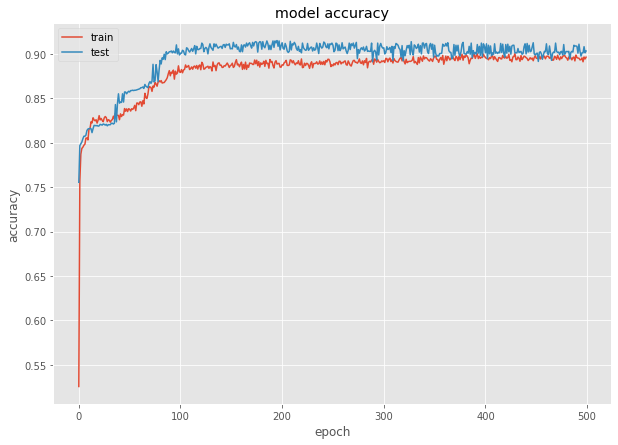

In [551]:
# summarize history for accuracy
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

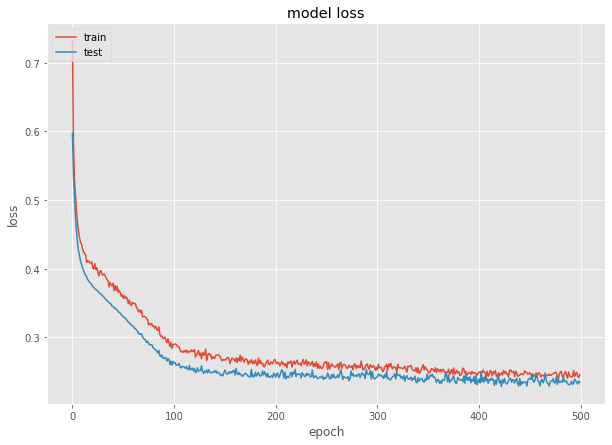

In [550]:
# summarize history for loss
plt.figure(figsize=(10, 7))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [421]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


array([[5.4321408e-02],
       [2.5557805e-05],
       [3.6104947e-21],
       ...,
       [3.1464875e-02],
       [3.6789775e-02],
       [4.4478338e-06]], dtype=float32)

In [439]:
y_score =classifier.predict(X_train)

In [440]:
y_score= y_score *10

In [441]:
y_score

array([[8.9788036e+00],
       [2.6209950e-02],
       [1.2527826e+00],
       ...,
       [9.2010932e-10],
       [1.3415012e+00],
       [1.1943692e+00]], dtype=float32)

In [448]:
a = np.empty(7475)
a.fill(10)

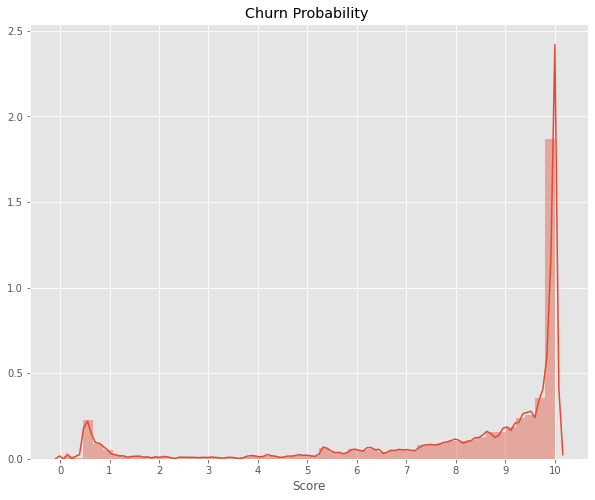

In [567]:
plt.figure(figsize =(10,8))
sns.distplot(a- y_score)
plt.title('Customer score')
plt.title('Churn Probability ')
plt.xlabel('Score')
plt.xticks(np.arange(11))
plt.show()

In [572]:
xxxxx= pd.DataFrame((a- y_score))

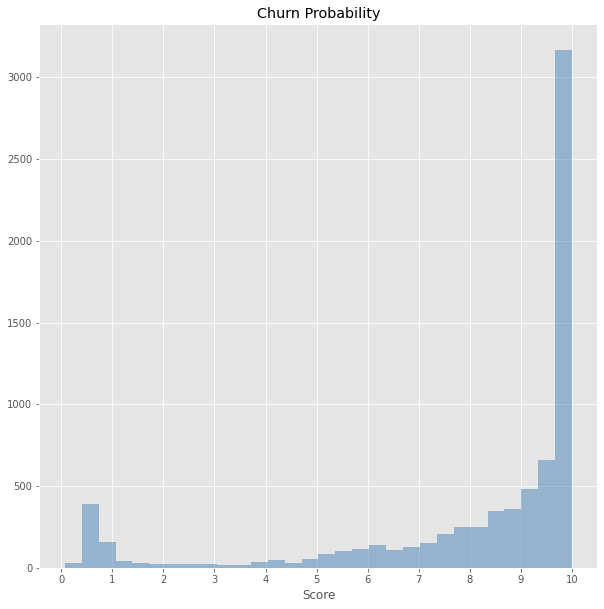

In [578]:
plt.figure( figsize= (10,10))
plt.hist(xxxxx.loc[:,1], bins=30, alpha=0.5,
         histtype='stepfilled', color='steelblue',
         edgecolor='none');
plt.title('Churn Probability')
plt.xlabel('Score')
plt.xticks(np.arange(11))
plt.show()

In [ ]:
df_